In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [11]:
salaries_data = pd.read_csv('Data\salaries.csv')
salaries_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 4 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   company                16 non-null     object
 1   job                    16 non-null     object
 2   degree                 16 non-null     object
 3   salary_more_then_100k  16 non-null     int64 
dtypes: int64(1), object(3)
memory usage: 644.0+ bytes


<>:1: SyntaxWarning: invalid escape sequence '\s'
<>:1: SyntaxWarning: invalid escape sequence '\s'
C:\Users\yarra\AppData\Local\Temp\ipykernel_8796\2458850992.py:1: SyntaxWarning: invalid escape sequence '\s'
  salaries_data = pd.read_csv('Data\salaries.csv')


<Axes: xlabel='degree', ylabel='salary_more_then_100k'>

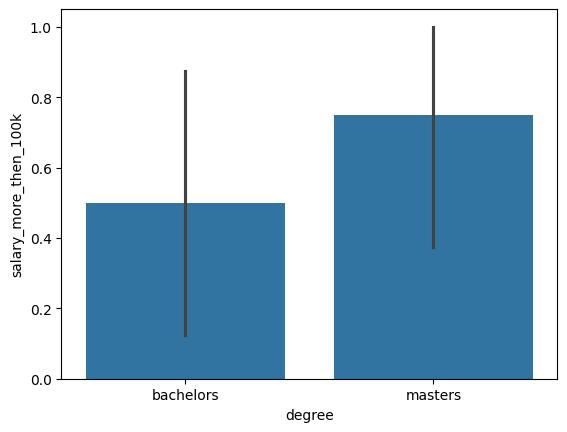

In [14]:
sns.barplot(data = salaries_data, x = 'degree', y = 'salary_more_then_100k')

In [16]:
X = salaries_data.drop(['salary_more_then_100k'], axis = 1)
y = salaries_data['salary_more_then_100k']

In [26]:
from sklearn.preprocessing import OrdinalEncoder

OE = OrdinalEncoder()

X_n = pd.DataFrame(OE.fit_transform(X[['company', 'job', 'degree']]), columns= ['company_n', 'job_n', 'degree_n'])

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_n, y)


In [38]:
from sklearn.tree import DecisionTreeClassifier
# from xgboost import XGBRegressor

# model = XGBRegressor(n_estimators = 200, learning_rate = 0.05, n_jobs = 12, early_stopping_rounds=5)

model = DecisionTreeClassifier()

# from sklearn.pipeline import Pipeline

# my_pipeline = Pipeline(steps= [('model', model)])

# from sklearn.model_selection import cross_val_score

# score = -1 * cross_val_score(my_pipeline, X_n, y, cv = 5, scoring = 'neg_mean_absolute_error')

# score

# model.fit(X_train, y_train, early_stopping_rounds = 5, eval_set = [(X_test, y_test)])
model.fit(X_train, y_train)#, 
        #   eval_set=[(X_test, y_test)], 
        #   verbose=True)

model.score(X_test, y_test)

0.5

In [36]:
import xgboost as xgb
print(xgb.__version__)

2.1.0
